# Vizualización de Colecciones de Datos con Geopandas

**Estudiantes:**
- Ruy Machado 13-10781@usb.ve
- Jesús Pino 13-11122@usb.ve

## Resumen

En el siguiente notebook se muestra el procedimiento para visualizar de forma gráfica una colección de datos sobre los equipos de ***TOMOGRAFIA AXIAL COMPUTERIZADA TAC*** disponibles en los hospitales de las comunidades autónomas de España, así como el número de equipos per capita en cada comunidad haciendo uso de la librería de Python, Geopandas. El notebook contempla el proceso de instalación de Geopandas y sus dependencias; la carga de los datos para el mapa base de España; la extracción de las cantidades totales de equipos TAC por comunidad autónoma; la presentación de los datos sobre el mapa; y por último una conclusión sobre el uso de Geopandas.

## 1. Instalación de Geopandas

__Geopandas__ es una libreria de Python que permite mostrar datos de forma geo-espacial. Para su instalación se deben instalar previamente las siguientes dependencias.

0. Pandas
1. GDAL 
2. Fiona
3. Pyproj
4. Shapely
5. Rtree
6. Descartes
7. Matplotlib

Las librerias GDAL, Fiona, Pyproj, Shapely y Rtree fueron descargadas desde el siguiente enlace [Dependencias](https://www.lfd.uci.edu/~gohlke/pythonlibs) e instaladas en el orden listado al usar el comando ***pip install*** desde la carpeta donde se han guardado los archivos descargados. A continuación se muestra el orden de instalación.

0. *pip install pandas*
1. *pip install GDAL-2.4.1-cp37-cp37m-win32.whl*
2. *pip install Fiona-1.8.6-cp37-cp37m-win32.whl*
3. *pip install pyproj-2.2.0-cp37-cp37m-win32.whl*
4. *pip install Shapely-1.6.4.post1-cp37-cp37m-win32.whl*
5. *pip install Rtree-0.8.3-cp37-cp37m-win32.whl*
6. *pip install descartes*
7. *pip install matplotlib*
7. *pip install geopandas*

La instalaciòn se realizó en un computador con sistema operativo Windows 7 de 32 bits y con versión 3.7 de Python

## 2. Carga de los Datos para el Mapa Base de España

El primer paso será importar las librerías que serán usadas (Pandas, Geopandas y Matplotlib).

In [2]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

Luego, se cargan los datos del mapa de España desde el archivo ***comunidades_autonomas_etrs89_30n.geojson***. Además, se muestra el header del dataframe que se acaba de cargar. 

In [3]:
fp = "comunidades_autonomas_etrs89_30n.geojson";  
spain = geopandas.read_file(fp);
spain.head()

,cartodb_id,texto_alt,texto,codigo,geometry
0,3,Asturias,Principado de Asturias,3,"(POLYGON ((-5.839882 43.661228, -5.842259 43.6..."
1,4,Illes Balears,Islas Baleares,4,"(POLYGON ((1.436015 38.759226, 1.439954 38.743..."
2,5,Canarias,Canarias,5,"(POLYGON ((-17.925102 27.849254, -17.923536 27..."
3,6,Cantabria,Cantabria,6,"(POLYGON ((-3.263816 43.265831, -3.249201 43.2..."
4,8,Castilla - La Mancha,Castilla - La Mancha,8,"(POLYGON ((-3.374051 40.640248, -3.372667 40.6..."


Para verificar si los datos se cargaron correctamente, se muestra el mapa con fondo blanco y bordes negros.

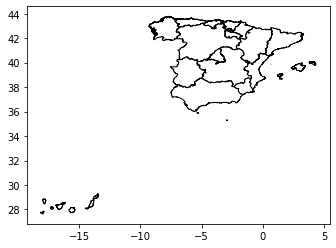

In [4]:
spain.plot(color='white', edgecolor='black');


## 3. Extracción de las cantidades totales de equipos TAC por comunidad autónoma.

Se cargan los archivos ***CNH_2018.xls*** y ***poblacion.csv*** donde se encuentra la cantidad de equipos de ***TOMOGRAFÍA AXIAL COMPUTARIZADA*** por hospital y la población por comunidad autónoma respectivamente. La comunidad autónoma a la que pertenece un hospital se indica en la columna ***CODAUTO*** que tiene un rango de 1 a 19. 

In [5]:
DatosExcel = pd.read_excel('CNH_2018.xls');
Datos = DatosExcel[['CODAUTO','TAC']];
pob = pd.read_csv('poblacion.csv');

print(Datos.head())
print(pob.head())

   CODAUTO  TAC
0       16    0
1       16    1
2       16    1
3       16    0
4       16    0
   CODAUT      POB
0       1  8405294
1       2  7516544
2       3  6587711
3       4  4948411
4       5  2699299


Luego se crea un Data Frame vacio llamado ***df*** que almacenará el total de los equipos disponibles por comunidad autónoma. Esto se logra al sumar los equipos de los hospitales que pertenecen a la misma comunidad.

In [6]:
columns = ['CODAUTO','TAC'];
df = pd.DataFrame(index = range(0,max(Datos.CODAUTO)), columns=columns);

for i in range(0, max(Datos.CODAUTO)):
    df.loc[i] = pd.Series({'CODAUTO':i+1,'TAC': sum(Datos[Datos.CODAUTO == i+1].TAC)})
    
print(df)
print(pob)

    CODAUTO  TAC
0         1  139
1         2   22
2         3   17
3         4   22
4         5   34
5         6    9
6         7   45
7         8   38
8         9  101
9        10   86
10       11   27
11       12   53
12       13  108
13       14   24
14       15   14
15       16   39
16       17    5
17       18    1
18       19    1
    CODAUT      POB
0        1  8405294
1        2  7516544
2        3  6587711
3        4  4948411
4        5  2699299
5        6  2410819
6        7  2172591
7        8  2127685
8        9  2030807
9       10  1479098
10      11  1316064
11      12  1176627
12      13  1067272
13      14  1024381
14      15   646197
15      16   580997
16      17   312719
17      18    84913
18      19    84667


Posteriormente, se debe ordenar el dataframe que contiene los polígonos del mapa de España, según código de la comunidad autónoma. Y luego, se añade la nueva columna con los equipos TAC totales y la población al dataframe ordenado. Con las dos nuevas columnas se puede calcular el número de equipos per cápita ***TACpcp*** mediante su división.

In [7]:
spain = spain.sort_values(by='codigo', ascending=True);
spain['TAC'] = df['TAC'];
spain['POB'] = pob['POB'];
spain['TACpcp'] = spain['TAC']/spain['POB'];
spain.head()

,cartodb_id,texto_alt,texto,codigo,geometry,TAC,POB,TACpcp
16,1,Andalucí­a,Andalucía\n,1,"(POLYGON ((-5.437333 36.064233, -5.437397 36.0...",5,312719,0.000016
17,2,Aragón,Aragón,2,"(POLYGON ((-0.747266 42.922375, -0.744123 42.9...",1,84913,0.000012
0,3,Asturias,Principado de Asturias,3,"(POLYGON ((-5.839882 43.661228, -5.842259 43.6...",139,8405294,0.000017
1,4,Illes Balears,Islas Baleares,4,"(POLYGON ((1.436015 38.759226, 1.439954 38.743...",22,7516544,0.000003
2,5,Canarias,Canarias,5,"(POLYGON ((-17.925102 27.849254, -17.923536 27...",17,6587711,0.000003


## 4. Presentación de los Datos
Por último, el mapa se grafica nuevamente de acuerdo a los valores de la columna ***TAC*** y ***TACpcp*** que indican el total de equipos de ***TOMOGRAFÍA AXIAL COMPUTARIZADA*** para cada comunidad autonoma y el número de equipos per capita respectivamente.

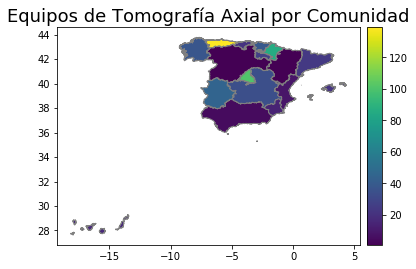

In [15]:
fig, ax = plt.subplots(1,1);
divider = make_axes_locatable(ax);
cax = divider.append_axes("right", size="5%", pad=0.1);
ax.set_title("Equipos de Tomografía Axial por Comunidad", fontsize = 18);
spain.plot(column='TAC',legend = True,edgecolor='grey', figsize = (10,10), ax = ax,cax = cax);




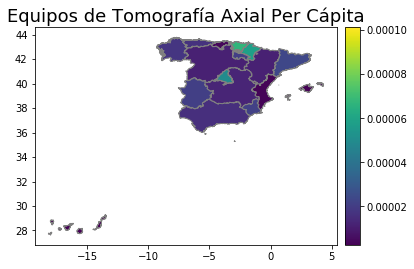

In [16]:
fig, ax = plt.subplots(1,1);
divider = make_axes_locatable(ax);
cax = divider.append_axes("right", size="5%", pad=0.1);
ax.set_title("Equipos de Tomografía Axial Per Cápita", fontsize = 18);
spain.plot(column='TACpcp',legend = True,edgecolor='grey', figsize = (10,10), ax = ax,cax = cax);

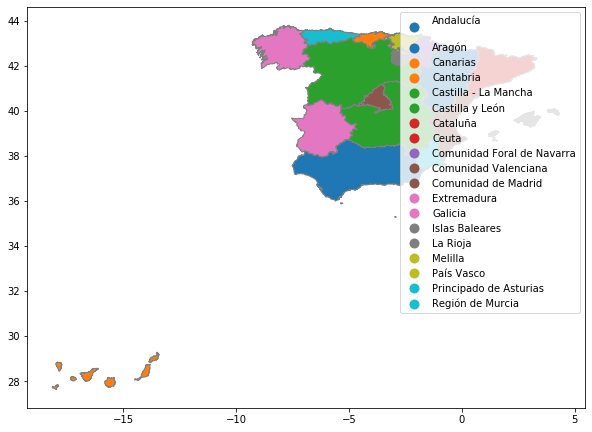

In [22]:

spain.plot(column='texto',legend = True,edgecolor='grey', figsize = (10,10));

## 5. Conclusiones 

Luego de observar los resultados, es claro que Geopandas es una herramienta poderosa para presentar datos de forma geo-espacial. La visialización de los datos brinda mayor información que los graficos tradicionales de torta o barras cuando se trata de colecciones de datos bastanate grandes, lo que es indispensable actualmente con el auge del BigData.